<a href="https://colab.research.google.com/github/LukaszBijak/Python/blob/main/Zaliczenie_IWD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#Zadanie 1

In [391]:
df_iris = pd.read_csv('ML-datasets/iris.csv')
df_iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [392]:
df_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [393]:
# species dla indeksu od 3-5

df_iris['species'].iloc[3:6]

3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: species, dtype: object

In [394]:
# ostatni wiersz + dwie ostanie kolumny

df_iris[['petal width','species']].iloc[-1]

petal width               1.8
species        Iris-virginica
Name: 149, dtype: object

In [395]:
df_iris[df_iris['sepal length'] > 3 ]

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Zadanie 2

In [396]:
parking = pd.read_csv('ML-datasets/parking.csv')
rating = pd.read_csv('ML-datasets/rating.csv')

In [397]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [398]:
#usuń wiersze 40-70
rating.drop(index=range(40,71), inplace=True)

In [399]:
#Usun ostatnią kolumnę ze zbioru rating i zapisali jako rating2
rating2 = rating.drop('service_rating', axis=1)

In [400]:
#Połącz ze sobą te zbiory używając inner join w funkcji merge i join
merged = rating2.merge(parking, how='inner', left_on='placeID', right_on = 'placeID')

In [401]:
#Użyj pd.concat na zbiorach parking i rating łączac po kolumnach i wyświetl ile jest
#wartości pustych dla wybranej przez Ciebie kolumny

combined = pd.concat([parking, rating], axis=1)
combined['parking_lot'].isnull().value_counts()
# Odpowiedź: True = 459 (wartości pustych)

False    702
True     459
Name: parking_lot, dtype: int64

In [402]:
#Posortuj rosnąco po kolumnie food_rating
rating.sort_values('food_rating', ascending=True)

,userID,placeID,rating,food_rating,service_rating
1160,U1068,132660,0,0,0
420,U1120,135085,0,0,0
984,U1025,132958,1,0,0
408,U1132,135032,1,0,1
995,U1097,135026,1,0,1
...,...,...,...,...,...
540,U1079,134986,2,2,2
542,U1079,132768,2,2,2
543,U1079,132766,1,2,1
503,U1113,135057,2,2,1


In [403]:
#Użyj sumy skumulowanej wartości po kolumnie service_rating

rating['suma_sukmulowana'] = np.cumsum(rating['service_rating'])
rating

,userID,placeID,rating,food_rating,service_rating,suma_sukmulowana
0,U1077,135085,2,2,2,2
1,U1077,135038,2,2,1,3
2,U1077,132825,2,2,2,5
3,U1077,135060,1,2,2,7
4,U1068,135104,1,1,2,9
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,1232
1157,U1011,132715,1,1,0,1232
1158,U1068,132733,1,1,0,1232
1159,U1068,132594,1,1,1,1233


#Zadanie 3

In [404]:
# Normalizacja

df_iris2 = df_iris.drop(columns = 'species')
norm = Normalizer()
normalized_iris = norm.fit_transform(df_iris2)
normalized_iris = pd.DataFrame(normalized_iris)
normalized_iris

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [405]:
# Standaryzacja

sc = StandardScaler()
std_iris = sc.fit_transform(df_iris2)
std_iris = pd.DataFrame(std_iris)
std_iris

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [406]:
# Label Encoder

le = LabelEncoder()
df_iris_le = le.fit_transform(df_iris.species)
df_iris_le = pd.DataFrame(df_iris_le, columns = ['spieces_label'])
df_iris_le = df_iris.join(df_iris_le)
df_iris_le

,sepal length,sepal width,petal length,petal width,species,spieces_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [407]:
# OneHotEncoder

ohe = OneHotEncoder()
enc_df = pd.DataFrame(ohe.fit_transform(df_iris[['species']]).toarray())
iris_ohe = df_iris.join(enc_df)
iris_ohe

,sepal length,sepal width,petal length,petal width,species,0,1,2
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,Iris-virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


#Zadanie 4

In [408]:
#Wczytaj dowolny zbiór danych i za pomocą biblioteki matplotlib dokonaj wykresu punktowego,
#liniowego oraz histogramu.
cars1 = pd.read_csv('ML-datasets/cars1.csv')

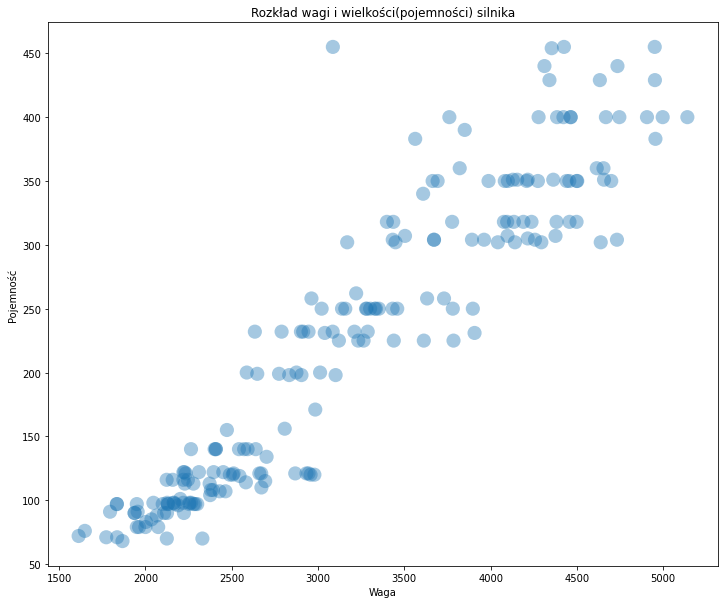

In [409]:
# Wykres punktowy:
cars1 = pd.read_csv('ML-datasets/cars1.csv')
x = cars1['weight']
y = cars1['displacement']
plt.figure(figsize=(12,10))
plt.title("Rozkład wagi i wielkości(pojemności) silnika")
plt.ylabel("Pojemność")
plt.xlabel("Waga")
plt.scatter(x, y, s=200, alpha = 0.4, edgecolors='none')
plt.show()

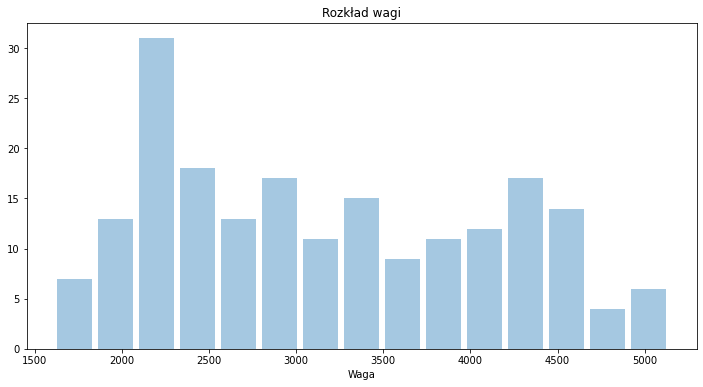

In [410]:
# Histogram
plt.figure(figsize=(12,6))
plt.title("Rozkład wagi")
plt.xlabel("Waga")
plt.hist(x, bins=15, alpha=0.4, rwidth=0.85)
plt.show()

In [411]:
# Wykres liniowy
apple = pd.read_csv('ML-datasets/apple.csv')
apple['Date'] = apple['Date'].astype('datetime64')

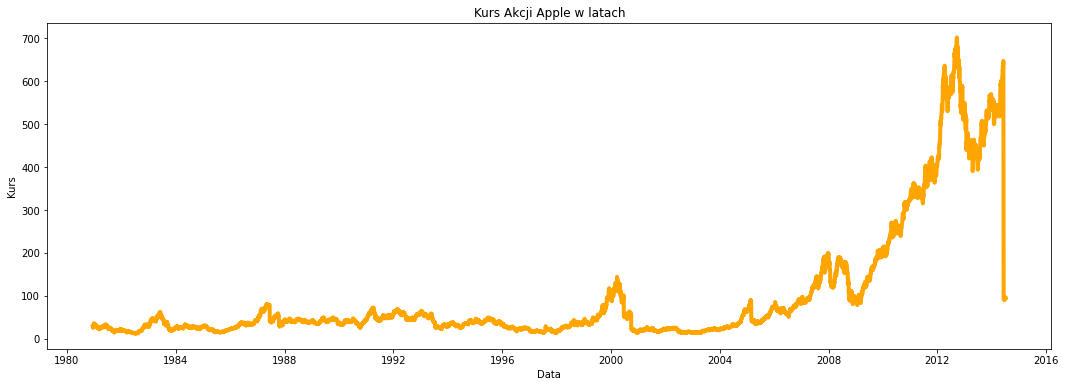

In [412]:
x2 = apple['Date']
y1 = apple['Close']
plt.figure(figsize=(18,6))
plt.title('Kurs Akcji Apple w latach')
plt.xlabel("Data")
plt.ylabel("Kurs")
plt.plot(x2, y1, color='orange', linewidth=4)
plt.show()

# Zadanie 5

In [413]:
#Wczytaj zbiór eurovision-2016.csv i stwórz wykres słupkowy zawierający informacje o tym ile punktów zdobył dany kraj od każdego z członków jury

In [414]:
euro = pd.read_csv('ML-datasets/eurovision-2016.csv')

In [415]:
agg = euro.groupby('To country').sum()

In [416]:
agg = agg[['Jury A','Jury B','Jury C','Jury D','Jury E']]

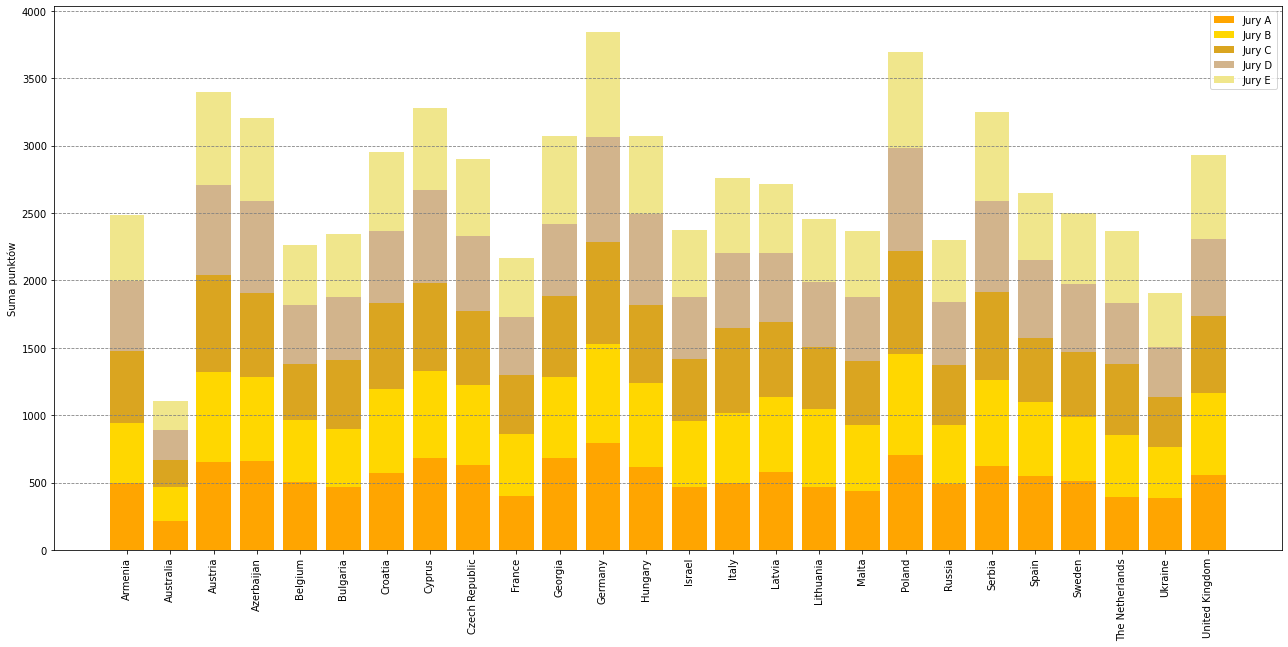

In [417]:
plt.rcParams['figure.figsize'] = [22, 10]
fig, ax = plt.subplots()
ax.bar(agg.index, agg['Jury A'], label = 'Jury A', color='orange')
ax.bar(agg.index, agg['Jury B'], bottom = agg['Jury A'],label = 'Jury B', color='gold'  )
ax.bar(agg.index, agg['Jury C'], bottom = agg['Jury A'] + agg['Jury B'],label = 'Jury C', color='goldenrod')
ax.bar(agg.index, agg['Jury D'], bottom = agg['Jury A'] + agg['Jury B'] + agg['Jury C'],label = 'Jury D', color='tan')
ax.bar(agg.index, agg['Jury E'], bottom = agg['Jury A'] + agg['Jury B'] + agg['Jury C'] + agg['Jury D'],label = 'Jury E', color='khaki')
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Suma punktów')
ax.grid(axis='y', color='gray', linestyle='dashed')
ax.legend()
plt.show()

#Zadanie 6

In [418]:
#Wykonaj wykres pudełkowy, skrzypcowy i rojowy dla dowolnych danych

In [419]:
cars = pd.read_csv('ML-datasets/cars.csv')

In [420]:
cars['price'] = pd.to_numeric(cars['price'], errors='coerce')

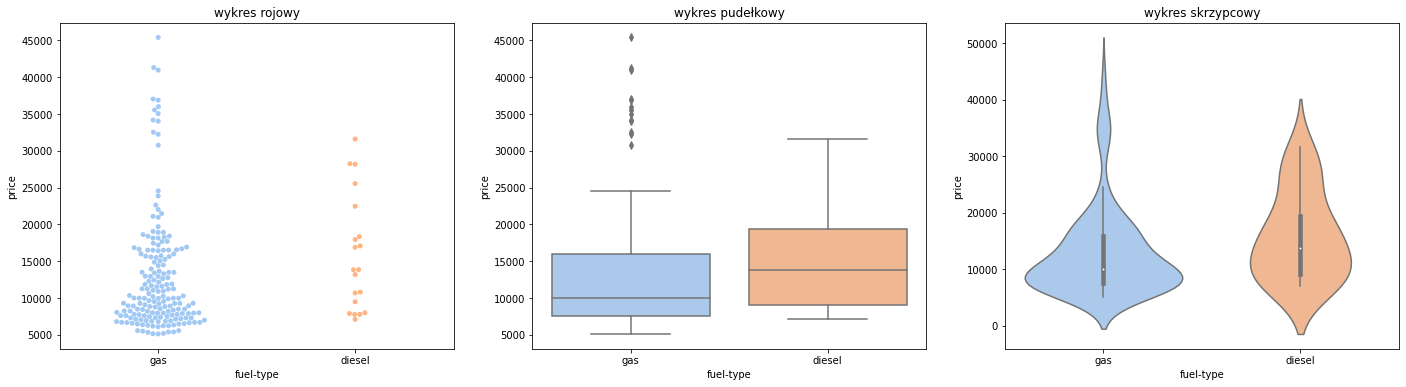

In [421]:
fig, axs = plt.subplots(ncols = 3, figsize=(24,6))
axs[0] = sns.swarmplot(x='fuel-type', y='price', data=cars, palette='pastel', ax=axs[0])
axs[0].set(xlabel='fuel-type', ylabel='price', title='wykres rojowy')
axs[1] = sns.boxplot(x='fuel-type', y='price', data=cars, palette='pastel', ax=axs[1])
axs[1].set(xlabel='fuel-type', ylabel='price', title='wykres pudełkowy')
axs[2] = sns.violinplot(x='fuel-type', y='price', data=cars, palette='pastel', ax=axs[2])
axs[2].set(xlabel='fuel-type', ylabel='price', title='wykres skrzypcowy')
plt.show()

#Zadanie 7

In [422]:
#Dla cars Przygotuj 4 wykresy, w 2 wierszach i 2 kolumnach, tak by współdzieliły wszystkie osie, 
#a następnie do każdego z nich przypisz podzbiór danych o innej liczbie cylindrów w silniku. 
#Pomiń najmniej liczną liczbę cylindrów. Wykorzystaj pętlę for tak, by nie wpisywać "add_trace" więcej niż raz.

#Zadanie 8

In [423]:
#Wyświetl dowolny wykres punktowy w bibliotece plotly na którym będą dwie reprezentacja brzegowe 
#oraz linia trendu dla regresji liniowej metoda najmniejszych kwadratów

cars1 = pd.read_csv('ML-datasets/cars1.csv')

In [424]:
fig = px.scatter(cars1, x="weight", y="displacement", marginal_x="histogram", marginal_y="histogram", trendline="ols")
fig.show()

#Zadanie 9

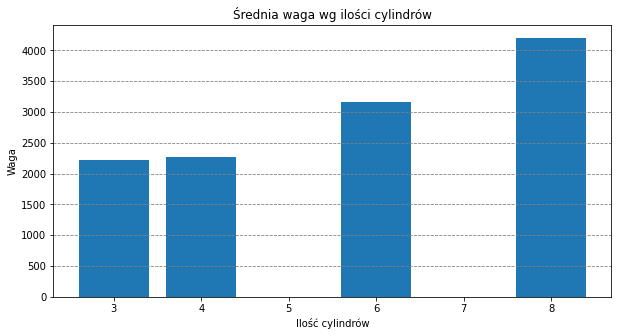

In [425]:
#Przedstaw wykres słupkowy przedstawiający średnią wagę samochodu względem liczby cylindrów

cars_agg = cars1.groupby('cylinders').mean()
x = cars_agg['weight']
cars_agg['cylinders'] = cars_agg.index
plt.figure(figsize=(10,5))
plt.title("Średnia waga wg ilości cylindrów")
plt.ylabel("Waga")
plt.xlabel("Ilość cylindrów")
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.bar(cars_agg['cylinders'], height = x)
plt.show()

#Zadanie 10

In [426]:
#Użyj zbioru titanic i wykonaj na nim 4 dowolne wizualiacje z wykorzystaniem poznanych pakietów. 
#Celem zadania jest to aby wspomniane wizualizacje pozwoliły ocenić która grupa pasażerów ma szanse przeżyć katastrofę 
#a która nie (powinno to wynikać bezpośrednio z wykresów). Na koniec zadania wymagana jest 2-3 zdaniowa interpretacja co wynika z tych wizualizacji

titanic = pd.read_csv('ML-datasets/titanic.csv')
titanic=titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'])

In [427]:
# uzupełnieni Null-i
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [428]:
titanic['Fare_range'] = pd.cut(titanic['Fare'], [0,30,80,500], labels=['0-30','30-80','80 and more'])
titanic['Age_range'] = pd.cut(titanic['Age'], [0,10,50,100], labels=['kids','adults', 'seniors'])
titanic = pd.get_dummies(titanic, columns=['Embarked', 'Sex', 'Pclass', 'Fare_range', 'Age_range'])
titanic=titanic.drop(columns=['Age','Fare',])

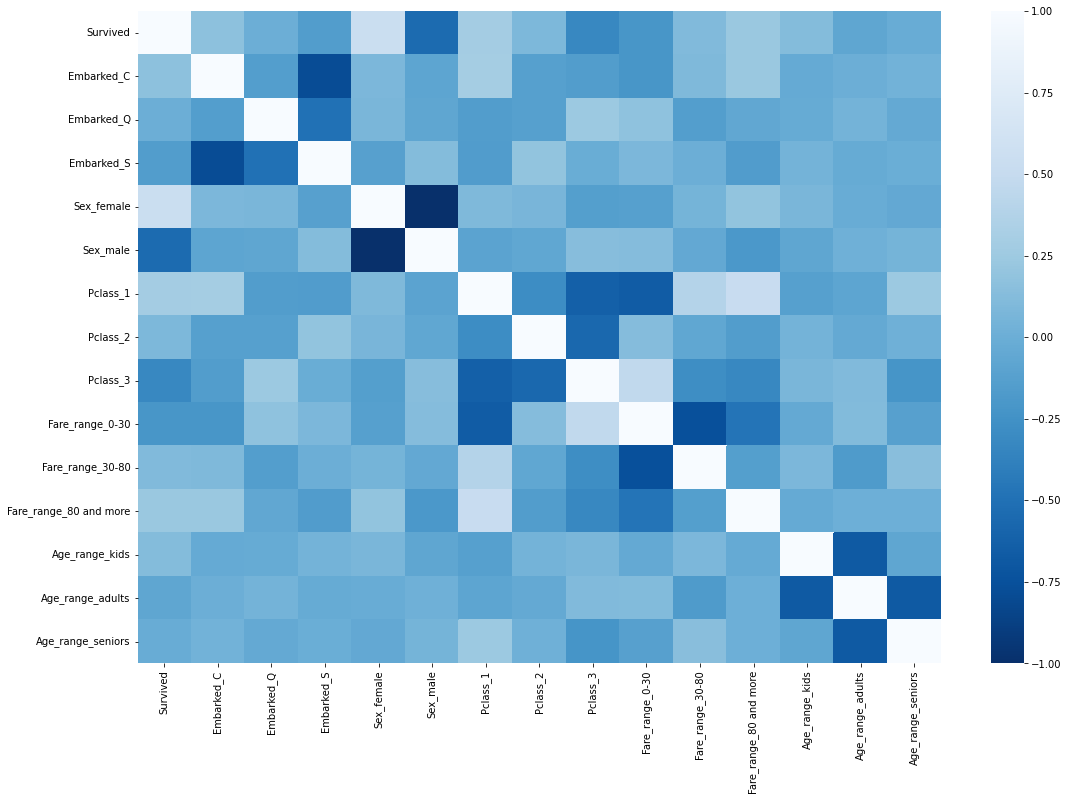

In [429]:
plt.figure(figsize = (18,12))
sns.heatmap(titanic.corr(),cmap = 'Blues_r')
plt.show()

##Odpowiedź

Z powyższej mapy korelacji wynika, że największą szanse na przeżycie (korelacja dodatnia z Survived)  miały:   kobiety, pasażerowie pierwszej klasy, którzy zapłacili najwiecej za bilet (80+), oraz osoby które zaokrętowały się w Cherbourg-u (Embarked_C).
Z kolei osobami, które miały najmniejsze szanse na przeżycie (koralacja z Survivred - ujemna):  byli męższczyźni, pasażerowie trzeciej klasy z najtańszymi biletami (Pclass_3, Fate_range_0-30) oraz osoby zaokrętowane w Sharebourg-u.
Co do wieku, wieksze szanse na przeżycie miały dzieci niż dorośli.